# Explore Bike Share Data

In [2]:
library(ggplot2)
library(lubridate) # Get day of week with `wday` function
library(anytime) # Quickly convert to time objects with `anytime` function

In [3]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [4]:
head(ny)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [5]:
head(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
,<int>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
6,1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [6]:
head(chi)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
2,955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
3,9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
4,304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
5,45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
6,1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


## Data Wrangling

We want to combine all these three datasets to make it easier to run our queries.

### 1. Add missing columns

Notice that the Washington dataset has only 7 columns. Add `Gender` and `Birth.Year` columns before concatenating the datasets and set the values to NULL. Also, we want to add `city` field so we do not lose the information on which city the record was coming from.

In [7]:
wash$Gender <- NA
wash$Birth.Year <- NA
wash$City <- 'Washington'
ny$City <- 'New York'
chi$City <- 'Chicago'

### 2. Correct data types

`Start.Time` and `End.Time` are not currently kept as proper datetime objects. This makes queries that operate on them take longer to run as we need to parse the types each time. Therefore, we correct them beforehand.

In [8]:
correctDates <- function(df_) {
    # Function to convert the start and end time of all rows.
    # We use `anytime` plugin which handles incorrect date and time formatting for us.
    
    df_$Start.Time <- anytime(df_$Start.Time)
    df_$End.Time <- anytime(df_$End.Time)
    df_
}

wash <- correctDates(wash)
chi <- correctDates(chi)
ny <- correctDates(ny)

In [9]:
head(wash)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
,<int>,<dttm>,<dttm>,<dbl>,<fct>,<fct>,<fct>,<lgl>,<lgl>,<chr>
1,1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington
2,482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Washington
3,1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA,Washington
4,665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA,Washington
5,1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA,Washington
6,1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA,Washington


### 3. Concatenate the dataframes
Concatenate the three dataframes into a single dataframe.

In [10]:
df <- rbind(ny, wash)
df <- rbind(df, chi)
head(df)

,X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
,<int>,<dttm>,<dttm>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>
1,5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York
2,4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York
3,2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York
4,3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York
5,6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York
6,1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York


## Question 1: What is the most common day of week?

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”


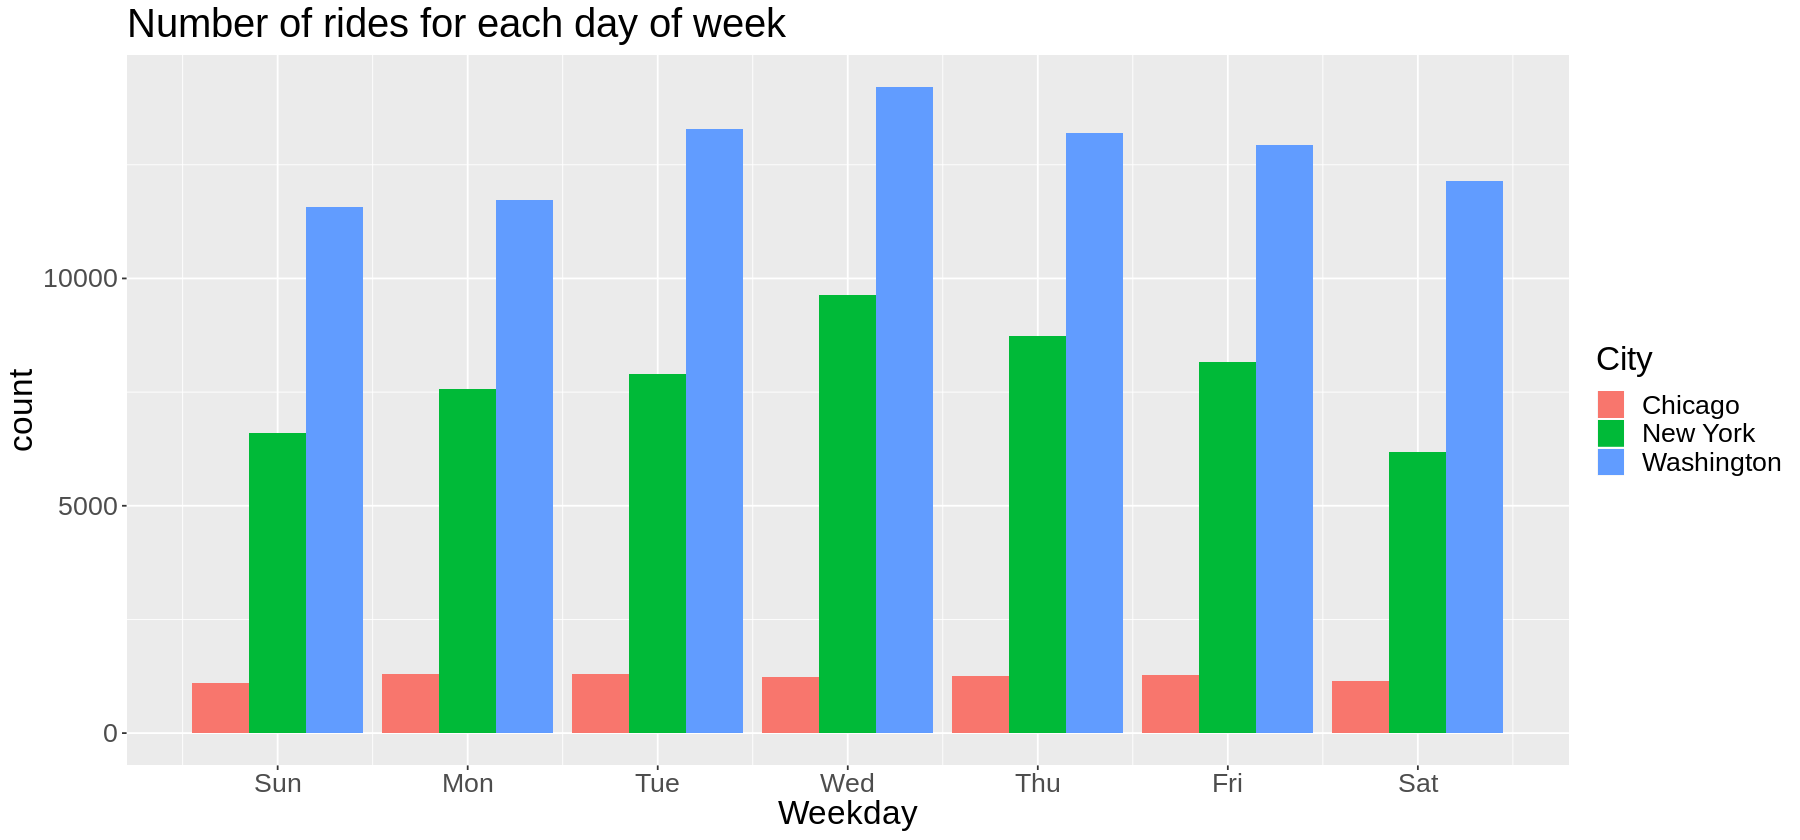

In [11]:
options(repr.plot.width=15, repr.plot.height=7)

# Create weekday field.
df$Weekday <- wday(df$Start.Time)

ggplot(aes(x=Weekday, fill=City), data=df) +
    geom_bar(position='dodge') +
    scale_x_continuous(breaks=c(1,2,3,4,5,6,7), labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Number of rides for each day of week")

The most common day, surprisingly, is Wednesday, and even more curious, it shows a kind of normal distribution with days further from Wednesday having fewer numbers of rides. This trend is uniform in both New York and Washington, while for Chicago it is not very clear. Let's see for only Chicago data to get a clearer picture:



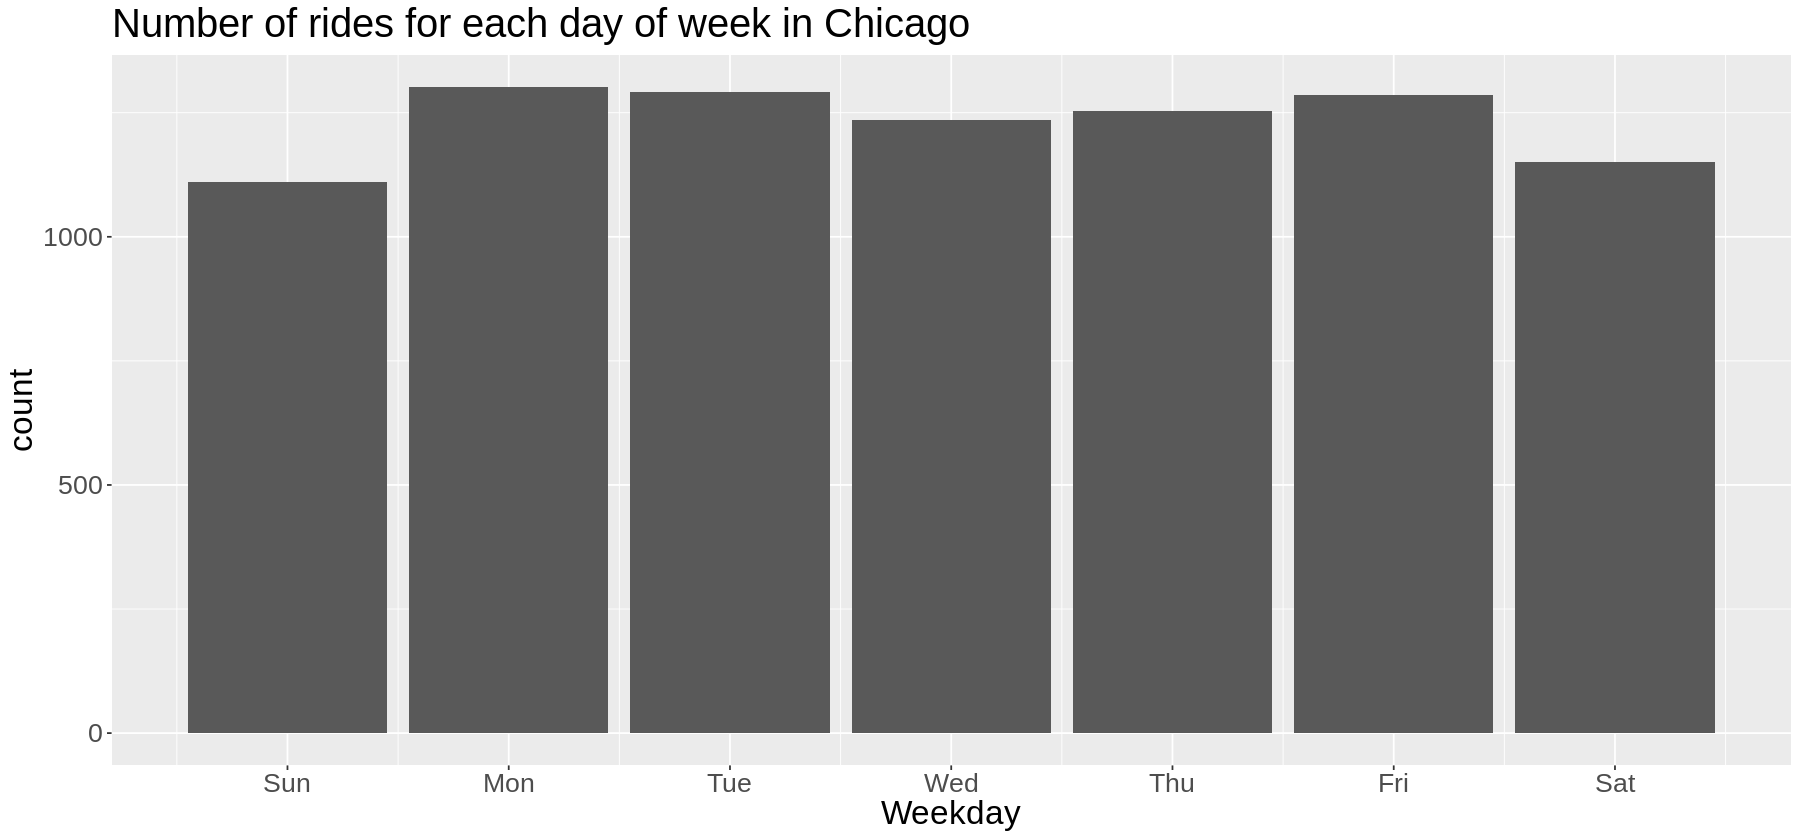

In [12]:
# Create weekday field for Chicago.
chi$Weekday <- wday(chi$Start.Time)

ggplot(aes(x=Weekday), data=chi) +
    geom_bar(position='dodge') +
    scale_x_continuous(breaks=c(1,2,3,4,5,6,7), labels=c("Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Number of rides for each day of week in Chicago")

Alright, the trend persisted only for New York and Washington, it seems.

I initially thought the bikes would be rented more on weekends. Perhaps people are mostly using it to commute to and from their workplaces? Let's find out by looking at most common time of day in the next question.

## Question 2: What is the most common time of day?

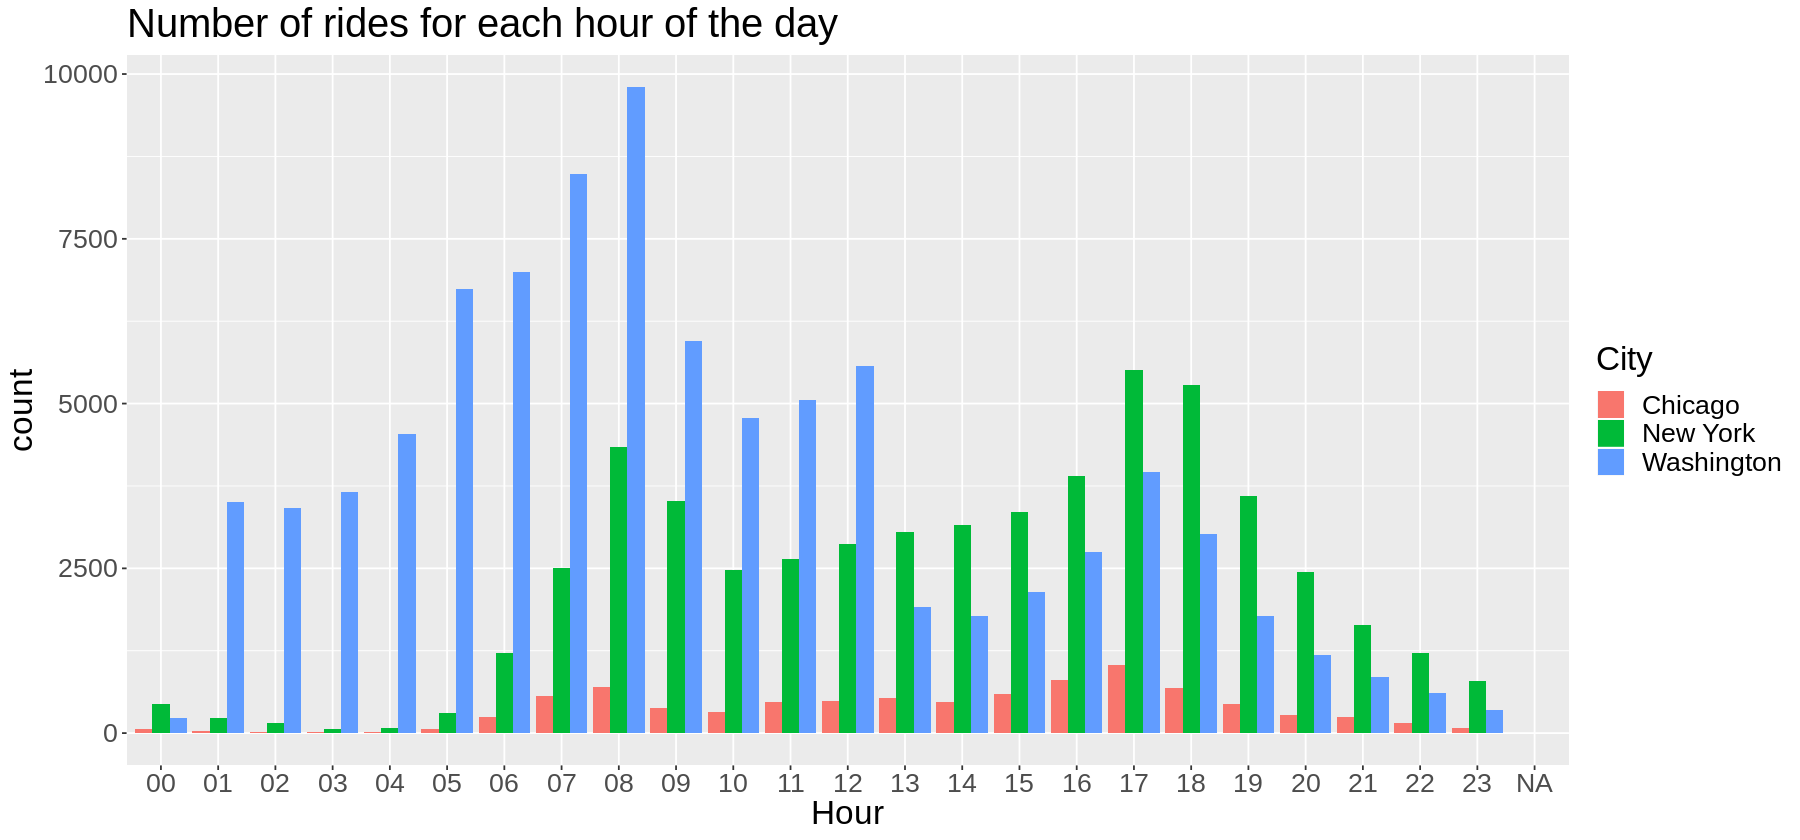

In [13]:
# Create day hour field.
df$Hour <-strftime(df$Start.Time, format="%H")

ggplot(aes(x=Hour, fill=City), data=df) +
    geom_bar(position='dodge') +
    theme(text = element_text(size = 20)) +
    ggtitle("Number of rides for each hour of the day")

Very interesting indeed! Notice the peak at around 8:00 and 17:00, just about the time most people start commuting to and from work, respectively. We have solved the mistery!

## Question 3: How old are our riders?

Now, since we are quite sure most riders were renting the bikes for work, if we can find out the ages of our riders we can somewhat use them as rough estimations of the working ages for each city (only for New York and Chicago, since Washington data do not have `Birth.Year` column.

In [14]:
calcAge <- function(df_) {
    # Calculate user age by taking the difference between year when they rode vs their birth year.
    df_$Age <- strtoi(strftime(df_$Start.Time, format="%Y")) - df_$Birth.Year
    df_
}
ny <- calcAge(ny)
chi <- calcAge(chi)

# Remove the previously created Weekday field for `chi`.
chi <- subset(chi, select = -c(Weekday))

Warning message:
“Removed 6965 rows containing non-finite values (stat_count).”


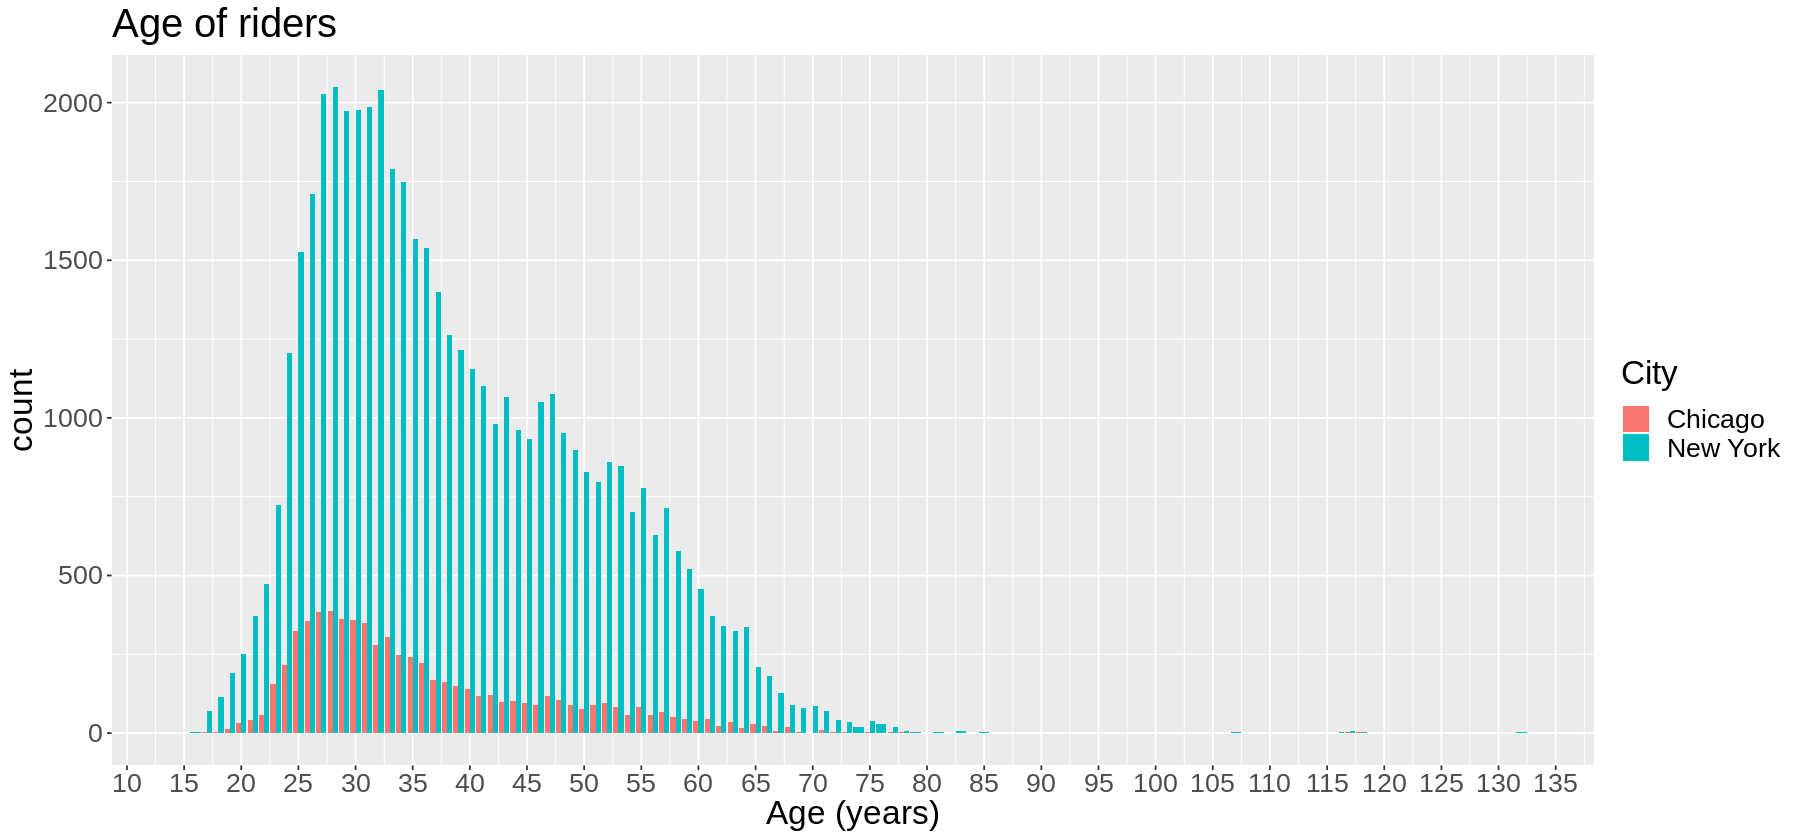

In [26]:
df1 <- rbind(ny, chi)

ggplot(aes(x=Age, fill=City), data=df1) +
    geom_bar(position='dodge') +
    theme(text = element_text(size = 20)) +
    ggtitle("Age of riders") +
    scale_x_continuous(breaks = seq(0, 150, by = 5)) +
    labs(x = "Age (years)")

In [28]:
summary(df1$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  15.00   29.00   36.00   38.46   47.00  132.00    6965 

In [29]:
summary(ny$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  16.00   29.00   36.00   38.79   47.00  132.00    5218 

In [30]:
summary(chi$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   15.0    28.0    33.0    36.1    42.0   118.0    1747 

Median of user age is 36 years old, with most users between 29 to 47 years old. Median user ages is younger in Chicago (33 years old) than New York (36 years old).

There are some users inputted invalid birth dates as we see the ages are skewed up to 132 years.

In [32]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')